In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import cv2

In [2]:
basedir = '/usr/share/fonts/truetype'
fpath= f'{basedir}/rouhei.ttf'
prop = fm.FontProperties(fname=fpath)

In [3]:
result = pd.read_csv('results/result.csv')
result.head(30)

,id,prediction,confidence
0,ewhaZTGe6-0-0006320,我不想麻煩大家才要发点別說,0.78
1,wy049ABW_90-0003930,友慧打破曉宣的陶笛,0.81
2,gXu1_qycL3Y-0001727,這是容家的家教嗎,0.74
3,w7aTU8hbuSw-0003817,我們隨時保持連絡,0.95
4,Vtt3jA7kqIc-0005183,NaN,0.00
5,FlxJd0Inubw-0003945,NaN,0.00
6,w7aTU8hbuSw-0005501,附近又是海邊,0.99
7,w7aTU8hbuSw-0000441,爸對他幽會吳信,0.61
8,J0o1fXsffUM-0002381,後我一定好要加,0.71
9,Ao40VkS73AI-0002637,我真想不通,0.99


In [4]:
result.prediction.isna().sum()

17

In [5]:
result.set_index('id', inplace=True)

In [6]:
result.loc['ewhaZTGe6-0-0006320']

prediction    我不想麻煩大家才要发点別說
confidence             0.78
Name: ewhaZTGe6-0-0006320, dtype: object

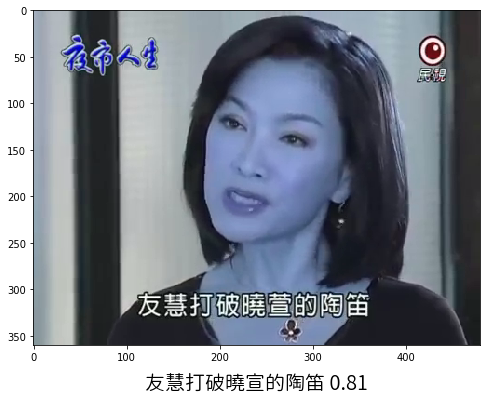

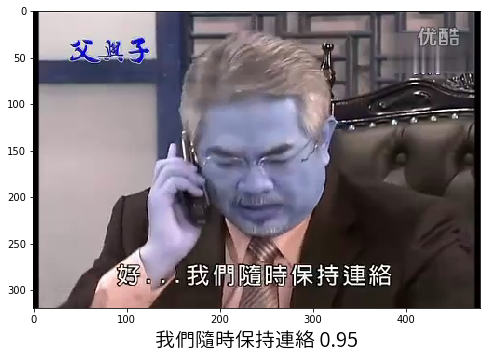

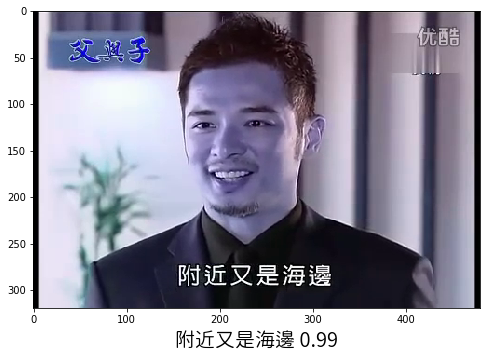

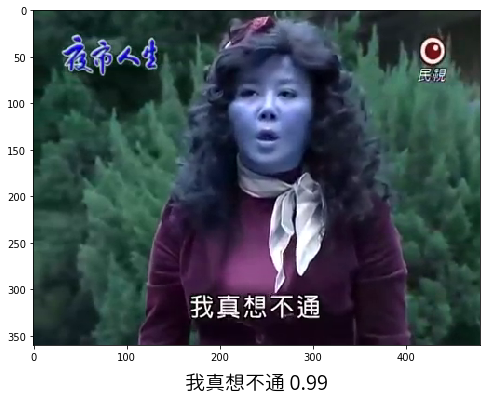

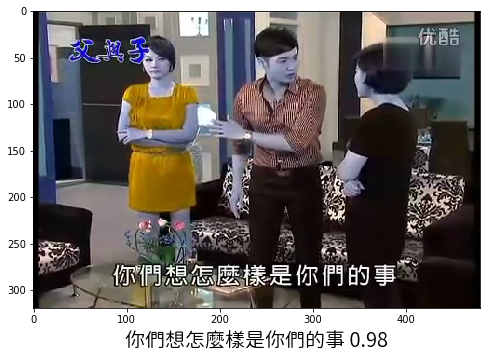

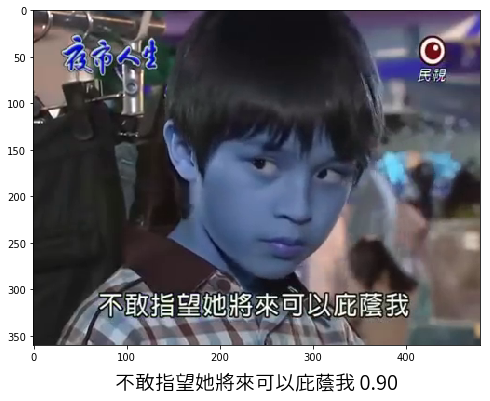

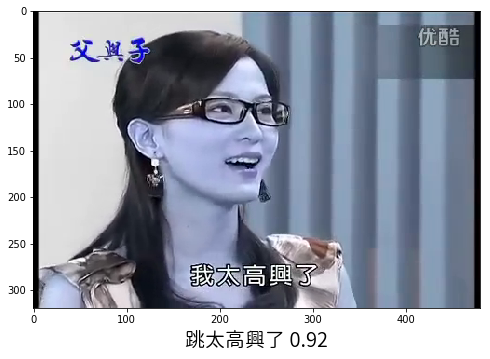

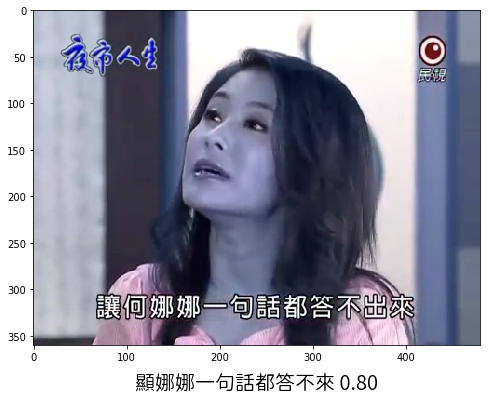

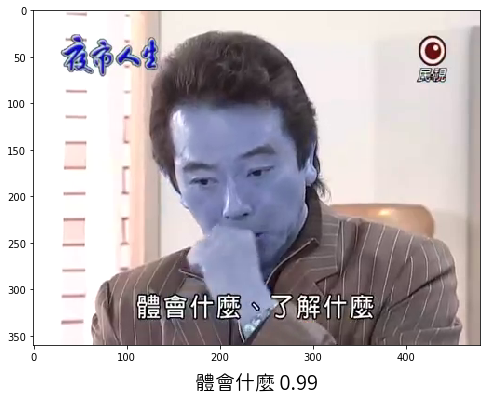

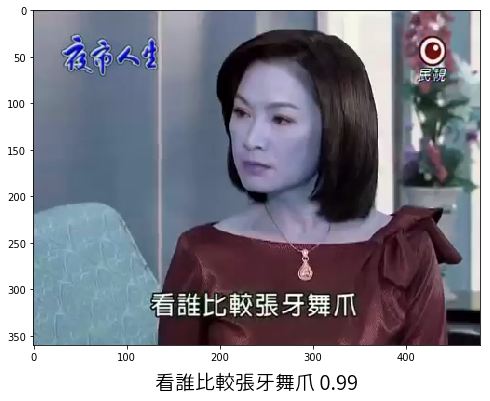

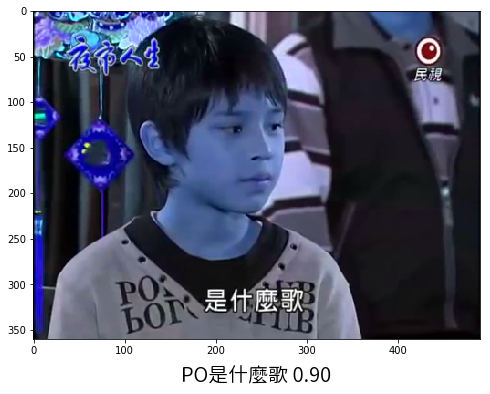

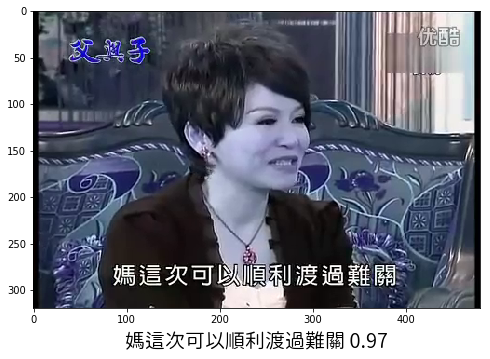

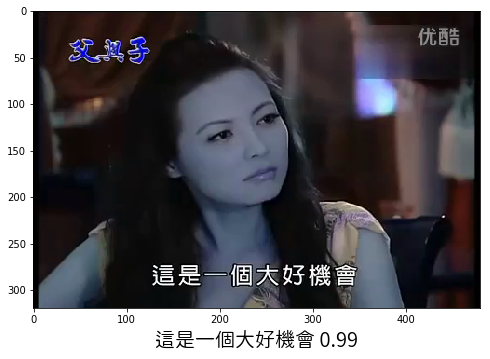

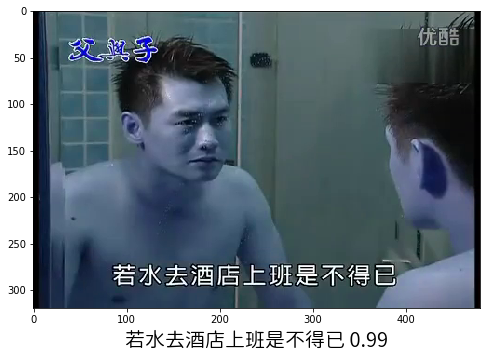

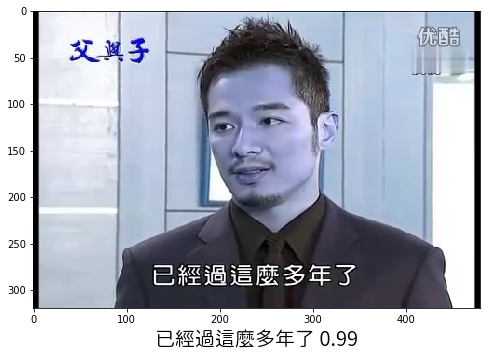

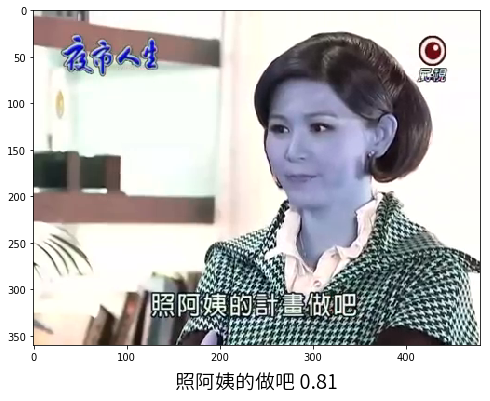

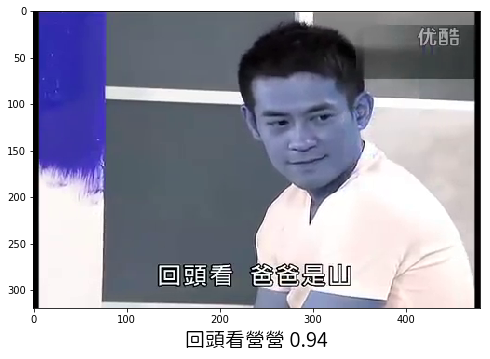

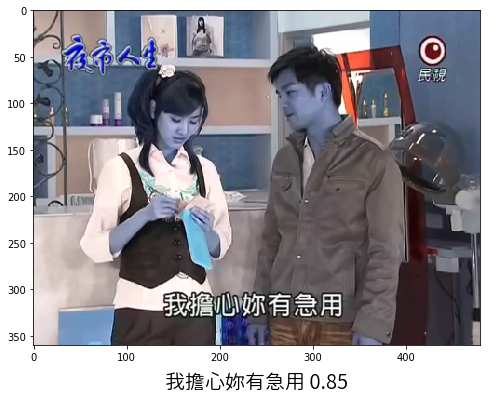

In [20]:
for id_ in result.index:
    if result.loc[id_].confidence < 0.8:
        continue
    fn = f'frames/{id_}.png'
    img = cv2.imread(fn)
    text = result.loc[id_].prediction 
    if result.loc[id_].confidence > 0:
        text += f' {result.loc[id_].confidence:.2f}'
    _,_ = plt.subplots(figsize=(8,8))
    plt.imshow(img)
    plt.title(text, fontproperties=prop,  fontsize=20, y=-0.15)